In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
'''
def dimension_2_random_walk(X):
    for U in range(1,5):
        U = np.random.randint(U) + 1
    
    if U == 1:
        X[0] += 1
    if U == 2:
        X[0] -= 1
    if U == 3:
        X[1] += 1
    if U == 4:
        X[1] += 1
        '''
        
def dimension_2_random_walk(X):
    U = np.random.random()
    if U > 0.5:
        if U > 0.75:
            X[0] += 1
        else:
            X[0] -= 1
    else:
        if U > 0.25:
            X[1] += 1
        else:
            X[1] -= 1

In [74]:
n = 30000
X = [0,0]
trajectoire = []
trajectoire.append(tuple(X))
longueurs = []
nbr_sections = 0
longueur = 0

while nbr_sections < n:
    
    dimension_2_random_walk(X)
    
    if tuple(X) in trajectoire:
        longueurs.append(longueur)
        nbr_sections += 1
        longueur = 0
    else:
        longueur += 1
    
    trajectoire.append(tuple(X))

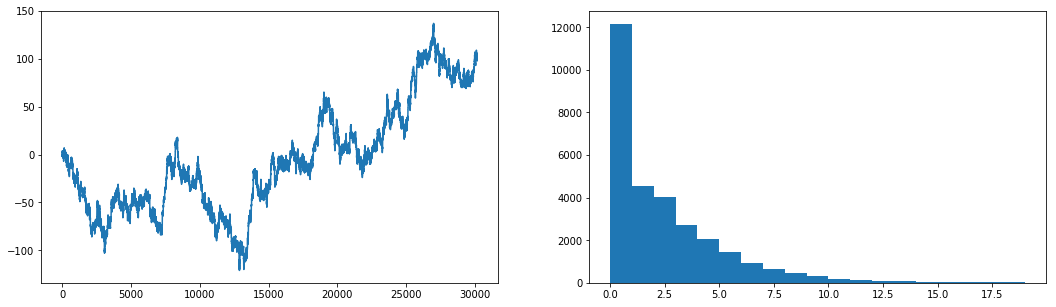

In [75]:
x = list()
y = list()

for i in range(len(trajectoire)):
    x.append(trajectoire[i][0])
    y.append(trajectoire[i][1])

fig, (ax1,ax2) = plt.subplots(1,2,figsize = (18,5))
ax1.plot(x,y)
ax2.hist(longueurs,bins=range(20))
plt.show()

In [76]:
proportions = []

for i in range(30):
    proportions.append({})
    for n in range(10):
        proportions[i][n] = longueurs[i*1000:(i+1)*1000].count(n)/10

In [81]:
import pandas as pd
proportions = pd.DataFrame(proportions)

In [87]:
proportions.describe()

,0,1,2,3,4,5,6,7,8,9
count,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,40.533333,15.216667,13.42000,9.126667,6.900000,4.773333,3.076667,2.153333,1.506667,1.096667
std,0.956045,0.796147,0.75265,1.259976,0.644339,0.668469,0.475382,0.384827,0.423396,0.331645
min,38.100000,13.500000,11.90000,6.400000,5.400000,3.800000,2.400000,1.600000,0.700000,0.400000
25%,39.950000,14.725000,13.02500,8.250000,6.600000,4.300000,2.700000,1.800000,1.200000,0.925000
50%,40.400000,15.250000,13.45000,9.300000,6.900000,4.600000,2.950000,2.200000,1.550000,1.000000
75%,41.100000,15.775000,13.90000,10.075000,7.275000,5.275000,3.500000,2.500000,1.775000,1.275000
max,42.400000,16.500000,14.90000,11.500000,7.900000,6.500000,4.100000,2.800000,2.500000,2.200000


# Q2.

In [2]:

def liste_aleatoire(d,k):
    '''Fonction qui renvoie une liste composée de k 1, k 2, …, k (2d) dans
    un ordre aléatoire.'''
    liste_directions = []
    for i in range(2*d):
        liste_directions = liste_directions + k*[i+1]

    for t in range(2*d*k):
        '''On génère I aléatoire uniformément dans t, t+1, …, 12'''
        I = np.random.randint(t,2*d*k+1)
        a = liste_directions[t]
        liste_directions[t] = liste_directions[I-1]
        liste_directions[I-1] = a

    return liste_directions

In [409]:
''' Exemple '''
liste_aleatoire(2,3)

[4, 1, 4, 3, 2, 1, 2, 3, 3, 4, 2, 1]

In [92]:
d = 2
k = 2

n = 3000
X = [[0,0] for t in range(2*d*k)]
trajectoires = [[(0,0)] for t in range(2*d*k)]

longueurs = [[] for t in range(2*d*k)]
nbr_sections = [0 for t in range(2*d*k)]
longueur = [0 for t in range(2*d*k)]

while nbr_sections[0] < n:
    
    '''On calcule la liste aléatoire qui va définir le mouvement de chacune
    des 2*d*k trajectoires'''
    liste_alea = liste_aleatoire(2,2)
    
    for i in range(len(trajectoires)):
        
        X[i][((liste_alea[i]-1)//2)-1] += 2*((liste_alea[i] % 2) - 0.5)
    
        if tuple(X[i]) in trajectoires[i]:
            longueurs[i].append(longueur[i])
            nbr_sections[i] += 1
            longueur[i] = 0
        else:
            longueur[i] += 1
    
        trajectoires[i].append(tuple(X[i]))
    

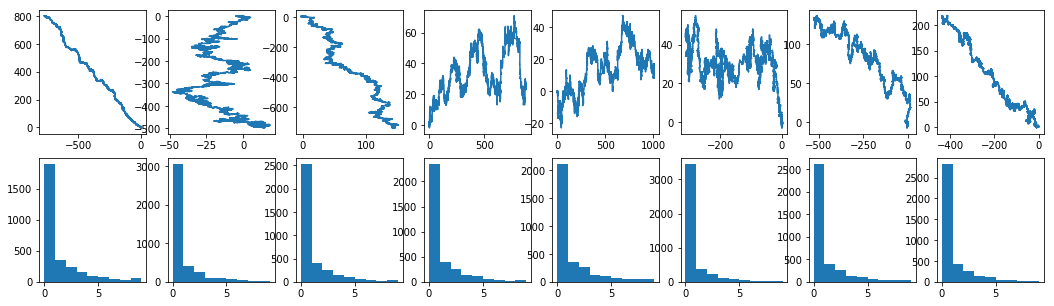

In [93]:
# Tracé des graphes

fig, (ax1,ax2) = plt.subplots(2,8,figsize = (18,5))

for t in range(8):
    x = list()
    y = list()

    for i in range(len(trajectoires[0])):
        x.append(trajectoires[t][i][0])
        y.append(trajectoires[t][i][1])

    ax1[t].plot(x,y)
    ax2[t].hist(longueurs[t],bins=range(10))
plt.show()

# Q3.

In [143]:
''' Idée : on code une marche aléatoire à peu près comme la premiere. Seulement, quand on arrive à une
longueur égale à une longueur définie, on va la continuer de n façons différentes, chacune de ces nouvelles
trajectoires s'arrêtant dès qu'il y a un croisement.'''

import copy

seuil = 7
n_rep = 10

n = 2000
X = [0,0]
trajectoire = []
trajectoire.append(tuple(X))
longueurs = []
nbr_sections = 0
longueur = 0

while nbr_sections < n:
    
    dimension_2_random_walk(X)
    
    if tuple(X) in trajectoire:
        trajectoire.append(tuple(X))
        longueur = 0
    else:
        trajectoire.append(tuple(X))
        longueur += 1
        
        if longueur == seuil:
            position_init = copy.deepcopy(X)
            i = 0
            nouv_trajectoires = [[] for t in range(n_rep)]
            while i < n_rep :
                
                dimension_2_random_walk(X)
                
                if tuple(X) in trajectoire + nouv_trajectoires[i]:
                    longueurs.append(longueur)
                    nbr_sections += 1
                    i += 1
                    X = copy.deepcopy(position_init)
                    longueur = seuil
                        
                else:
                    nouv_trajectoires[i].append(tuple(X))
                    longueur += 1
    

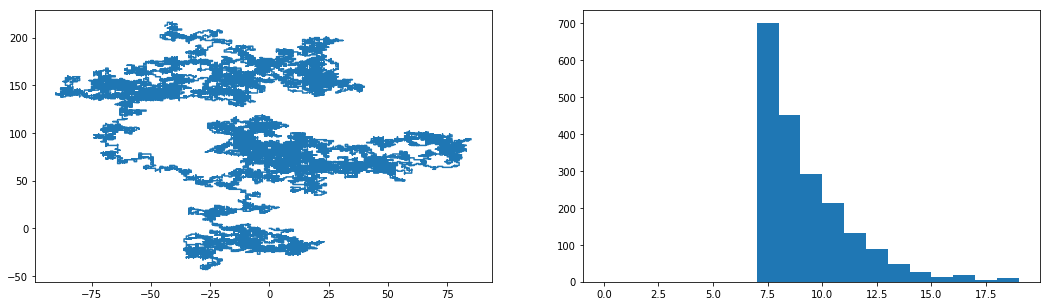

In [144]:
x = list()
y = list()

for i in range(len(trajectoire)):
    x.append(trajectoire[i][0])
    y.append(trajectoire[i][1])

fig, (ax1,ax2) = plt.subplots(1,2,figsize = (18,5))
ax1.plot(x,y)
ax2.hist(longueurs,bins=range(20))
plt.show()